In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import folium
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from IPython.core.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

c:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\HP\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\HP\AppData\Local\Temp\ipykernel_17952\663807505.py:14: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
df = pd.read_csv('Krigged_Data up to 2017.csv')

In [4]:
df.head()

,FID_,DNAME_2011,Typh_Inc,X_coord,Y_coord,HH_Wash,PH_Lands,P_Density,Urban_leve,ARainfall,Temp_Max,Temp_Min,Typh_Rate,Pn_Floods,P_male,P_Female,Typh_Per,OBJECTID
0,NaN,ABIM,534,33.730702,2.747649,69,4,45.9,15.900000,102.300003,29.700001,18.500000,0.004946,3.1,52456,55510,0.206406,0
1,NaN,ADJUMANI,137,31.769442,3.225610,80,0,76.2,18.200001,110.000000,30.500000,18.799999,0.000608,5.3,108298,116953,0.052954,1
2,NaN,AGAGO,694,33.346874,2.909709,71,0,65.1,12.800000,104.300003,30.000000,18.400000,0.003047,0.0,110495,117297,0.268251,2
3,NaN,ALEBTONG,236,33.256240,2.267383,85,0,148.0,2.100000,111.900002,29.900000,17.299999,0.001037,1.7,110989,116552,0.091221,3
4,NaN,AMOLATAR,647,32.739009,1.619290,55,0,127.0,14.600000,120.000000,29.500000,17.299999,0.004396,1.7,73014,74152,0.250084,4


In [5]:
print(df.dtypes)

FID_          float64
DNAME_2011     object
Typh_Inc        int64
X_coord       float64
Y_coord       float64
HH_Wash         int64
PH_Lands        int64
P_Density     float64
Urban_leve    float64
ARainfall     float64
Temp_Max      float64
Temp_Min      float64
Typh_Rate     float64
Pn_Floods     float64
P_male          int64
P_Female        int64
Typh_Per      float64
OBJECTID        int64
dtype: object


In [6]:
print(df.isnull().sum())

FID_          112
DNAME_2011      0
Typh_Inc        0
X_coord         0
Y_coord         0
HH_Wash         0
PH_Lands        0
P_Density       0
Urban_leve      0
ARainfall       0
Temp_Max        0
Temp_Min        0
Typh_Rate       0
Pn_Floods       0
P_male          0
P_Female        0
Typh_Per        0
OBJECTID        0
dtype: int64


In [7]:
df = df.drop_duplicates()

In [8]:
df['Population'] = df['P_male'] + df['P_Female']
df['Interaction_Temp_Density'] =  df['Temp_Max'] * df['P_Density']

In [9]:
df_sorted = df.sort_values(by='Typh_Rate', ascending=False)
top_n = 20
top_df = df_sorted.head(top_n)

In [10]:
m = folium.Map(location=[1.3733, 32.2903], zoom_start=7)

# Plot points on the map for top districts
for index, row in top_df.iterrows():
    folium.Marker(location=[row['Y_coord'], row['X_coord']], popup=row['DNAME_2011']).add_to(m)

In [11]:
m

In [12]:
df_sorted = df.sort_values(by='Typh_Inc', ascending=False)
top_n = 20
top_df = df_sorted.head(top_n)

In [13]:
m = folium.Map(location=[1.3733, 32.2903], zoom_start=7)

# Plot points on the map for top districts
for index, row in top_df.iterrows():
    folium.Marker(location=[row['Y_coord'], row['X_coord']], popup=row['DNAME_2011']).add_to(m)

In [14]:
m

In [15]:
typh_avg = df['Typh_Inc'].mean()
print(typh_avg)

2334.6875


In [16]:
df['Typh_Inc_Label'] = df['Typh_Inc'].apply(lambda x: 'High' if x > typh_avg else 'Low')

In [17]:
for index, row in df.iterrows():
    if row['Typh_Inc_Label'] == 'High':
        marker_color = 'red'
    else:
        marker_color = 'blue'
    
    folium.Marker(location=(row['Y_coord'], row['X_coord']), 
                  popup=row['DNAME_2011'], 
                  icon=folium.Icon(color=marker_color)).add_to(m)

In [18]:
m

In [19]:
df = df.drop(columns=['FID_', 'DNAME_2011', 'X_coord', 'Y_coord', 'OBJECTID', 'Typh_Inc', 'Population', 'Typh_Rate', 'P_male', 'P_Female'])
df.head()

,HH_Wash,PH_Lands,P_Density,Urban_leve,ARainfall,Temp_Max,Temp_Min,Pn_Floods,Typh_Per,Interaction_Temp_Density,Typh_Inc_Label
0,69,4,45.9,15.900000,102.300003,29.700001,18.500000,3.1,0.206406,1363.230037,Low
1,80,0,76.2,18.200001,110.000000,30.500000,18.799999,5.3,0.052954,2324.100000,Low
2,71,0,65.1,12.800000,104.300003,30.000000,18.400000,0.0,0.268251,1953.000000,Low
3,85,0,148.0,2.100000,111.900002,29.900000,17.299999,1.7,0.091221,4425.199941,Low
4,55,0,127.0,14.600000,120.000000,29.500000,17.299999,1.7,0.250084,3746.500000,Low


In [20]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [21]:
le = LabelEncoder()
y = le.fit_transform(y)

In [22]:
print(y)

[1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1
 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0
 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 1]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)

In [25]:
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [26]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=kf, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

rfc = RandomForestClassifier(**best_params)

Model: RandomForestClassifier
Average Accuracy: 0.9818
Average Precision: 0.9778
Average Recall: 1.0000
Average F1 Score: 0.9875


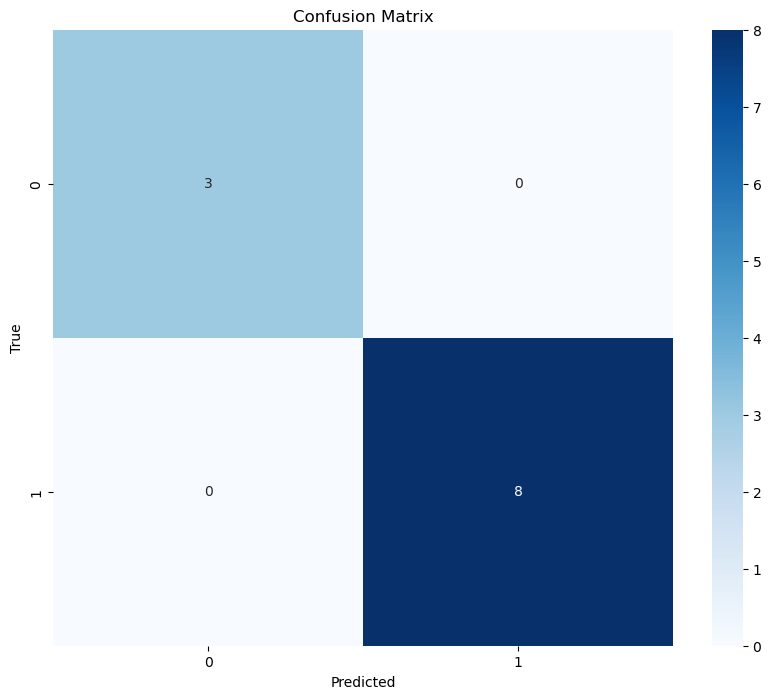

In [27]:
print(f"Model: {rfc.__class__.__name__}")
accuracies = []
recalls = []
precisions = []
f1s = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # Standardize features
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  rfc.fit(X_train, y_train)
  y_pred = rfc.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  accuracies.append(accuracy)
  recalls.append(recall)
  precisions.append(precision)
  f1s.append(f1)

average_accuracy = sum(accuracies) / len(accuracies)
average_precision = sum(precisions) / len(precisions)
average_recall = sum(recalls) / len(recalls)
average_f1 = sum(f1s) / len(f1s)

print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['0', '1'], title=f"Confusion Matrix")

In [28]:
param_grid_xgb = {'n_estimators': [100, 200],
                  'max_depth': [3, 6, 9],
                  'learning_rate': [0.1, 0.01],
                  'subsample': [0.8, 1.0],
                  'colsample_bytree': [0.8, 1.0]}

grid_search_xgb = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid_xgb, cv=kf, scoring='accuracy')
grid_search_xgb.fit(X, y)

best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

xgb = XGBClassifier(**best_params_xgb)

[21:03:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:03:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:03:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:03:59] WARNING:

Model: XGBClassifier
[21:04:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:04:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[21:04:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:04:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:04:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:04:31] WARNING:

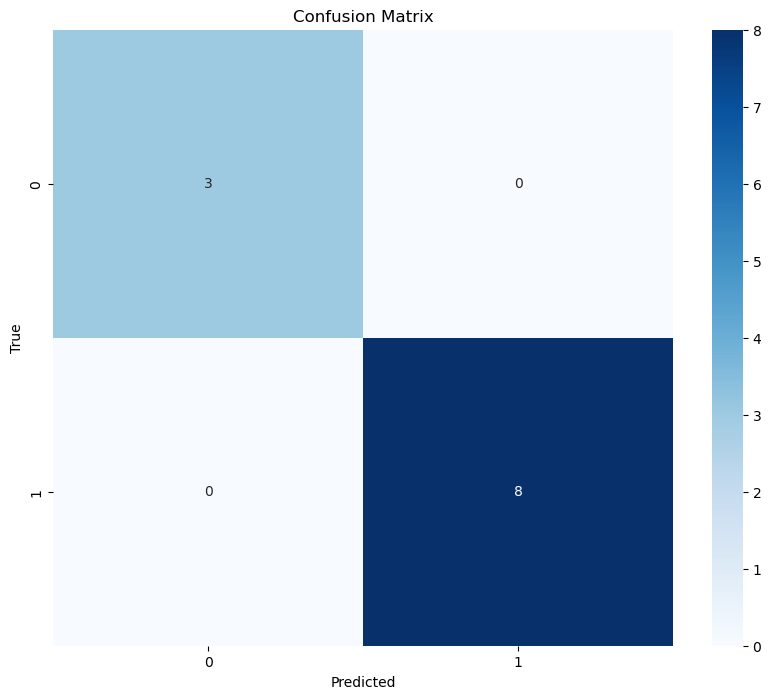

In [29]:
print(f"Model: {xgb.__class__.__name__}")
accuracies = []
recalls = []
precisions = []
f1s = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # Standardize features
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  xgb.fit(X_train, y_train)
  y_pred = xgb.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  accuracies.append(accuracy)
  recalls.append(recall)
  precisions.append(precision)
  f1s.append(f1)

average_accuracy = sum(accuracies) / len(accuracies)
average_precision = sum(precisions) / len(precisions)
average_recall = sum(recalls) / len(recalls)
average_f1 = sum(f1s) / len(f1s)

print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['0', '1'], title=f"Confusion Matrix")

## Pick XGBoost since it has the highest recall score and best confusion matrix

In [31]:
y_pred = xgb.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]
